In [2]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [3]:
x1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

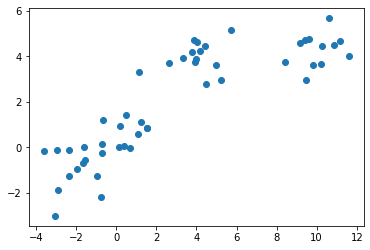

In [10]:
plt.scatter(x1[:,0], x1[:, 1], marker='o')

In [11]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

In [12]:
agglom1 = AgglomerativeClustering(n_clusters=4, linkage='complete')

In [13]:
agglom2 = AgglomerativeClustering(n_clusters=4, linkage='single')

In [14]:
agglom.fit(x1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')

In [15]:
agglom1.fit(x1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=4, pooling_func='deprecated')

In [16]:
agglom2.fit(x1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=4,
            pooling_func='deprecated')

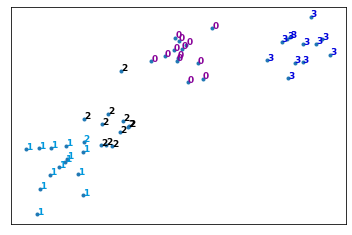

In [20]:
plt.figure(figsize=(6,4))
x_min, x_max = np.min(x1, axis=0), np.max(x1, axis=0)
x1 = (x1 - x_min)/(x_max - x_min)


for i in range(x1.shape[0]):
    
    plt.text(x1[i,0],x1[i,1],str(y1[i]),
    color = plt.cm.nipy_spectral(agglom.labels_[i]/10.),
    fontdict={'weight':'bold','size':9})
    
plt.xticks([])
plt.yticks([])

plt.scatter(x1[:,0],x1[:, 1], marker='.')
plt.show()
             

In [19]:
x1.shape

(50, 2)

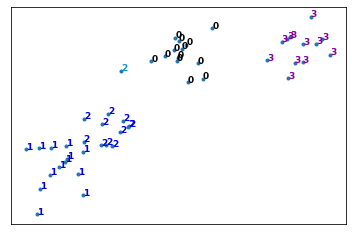

In [22]:
plt.figure(figsize=(6,4))
x_min, x_max = np.min(x1, axis=0), np.max(x1, axis=0)
x1 = (x1 - x_min)/(x_max - x_min)


for i in range(x1.shape[0]):
    
    plt.text(x1[i,0],x1[i,1],str(y1[i]),
    color = plt.cm.nipy_spectral(agglom2.labels_[i]/10.),
    fontdict={'weight':'bold','size':9})
    
plt.xticks([])
plt.yticks([])

plt.scatter(x1[:,0],x1[:, 1], marker='.')
plt.show()
             

In [25]:
dist_matrix = distance_matrix(x1, x1)
print(dist_matrix)

[[0.         0.13099459 0.06912634 ... 0.43972478 0.52157781 0.36103101]
 [0.13099459 0.         0.1026789  ... 0.49343708 0.5883085  0.40980346]
 [0.06912634 0.1026789  0.         ... 0.40472898 0.4947323  0.42401153]
 ...
 [0.43972478 0.49343708 0.40472898 ... 0.         0.10557037 0.77532026]
 [0.52157781 0.5883085  0.4947323  ... 0.10557037 0.         0.83834282]
 [0.36103101 0.40980346 0.42401153 ... 0.77532026 0.83834282 0.        ]]


In [27]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


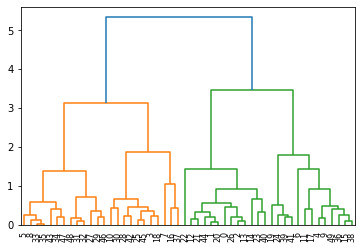

In [29]:
dendro = hierarchy.dendrogram(Z)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


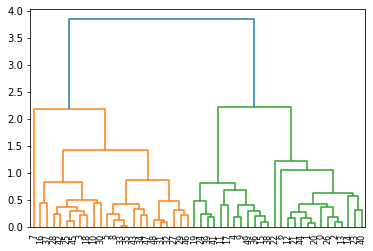

In [31]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

In [34]:
!wget -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

--2021-05-07 15:26:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2021-05-07 15:26:11 (273 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [38]:
filename = 'cars_clus.csv'
pdf  = pd.read_csv(filename)
pdf.shape
pdf.head(3)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0


In [36]:
pdf.size

2544

In [37]:
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828
1,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673
2,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647
3,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150
4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,17.531,NaN,0.0,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2.864
155,3.493,NaN,0.0,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,1.251
156,18.969,NaN,0.0,36.00,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,2.943
157,NaN,NaN,NaN,21.50,1.5,76.0,106.3,67.9,175.0,2.932,11.9,46.0,NaN


In [42]:
pdf.isnull().count()

manufact     159
model        159
sales        159
resale       159
type         159
price        159
engine_s     159
horsepow     159
wheelbas     159
width        159
length       159
curb_wgt     159
fuel_cap     159
mpg          159
lnsales      159
partition    159
dtype: int64

In [43]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

Shape of dataset before cleaning:  2544


In [44]:
pdf = pdf.dropna()

In [46]:
pdf.isnull().count()

manufact     117
model        117
sales        117
resale       117
type         117
price        117
engine_s     117
horsepow     117
wheelbas     117
width        117
length       117
curb_wgt     117
fuel_cap     117
mpg          117
lnsales      117
partition    117
dtype: int64

In [47]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  1872
Shape of dataset after cleaning:  1872


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
